## Lab 7: Direction Fields

So far we have been talking about <i>first order equations</i>, which are equations that feature only the first derivative of the state variable $y$. Typically, we will be able to write these functions in the form $$\frac{dy}{dt} = F(t,y)$$ for some function $F$. This means that for any point $(t,y)$, we can determine what the slope of the function $y$ is by evaluating $F(t,y)$.

Today, we will be visualizing the function $F$ as a collection of vectors in the plane $\mathbb{R}^2$ (called a direction field) that represents the slope of $y$ at various points. We will compare how solutions with different initial conditions travel through these direction fields, which will hopefully give us some intuition on what solutions will look like, without actually finding the solutions.

#### The meshgrid function

In order to plot a direction field, we need to first define an array of points in $\mathbb{R}^2$, then we need to define the slope of $y$ at each of these points. In order to define the array of points, we use <code>numpy</code>'s <code>meshgrid</code> function. This takes vectors of numbers, which define points in the $t$ direction and $y$ direction, and returns a grid of points in the $t,y$ plane.

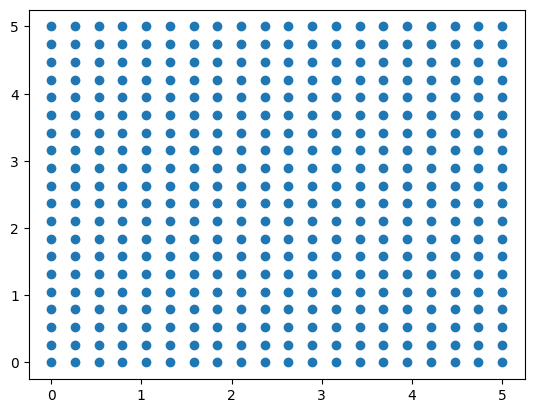

In [2]:
import numpy as np
from matplotlib import pyplot as plt
t_range = np.linspace(0,5,20) #vector of t points
y_range = np.linspace(0,5,20) #vector of y points
t,y = np.meshgrid(t_range,y_range) #array of (t,y) points

plt.scatter(t,y)

## Example of a direction field.
Consider the differential equation $$\frac{dy}{dt}  = -yt .$$

We want to plot out the direction field for this differential equation. In order to do that, we define a function to compute the right hand side $F(t,y) = -yt,$ and use the meshgrid we created in order to compute the slopes. The plotting function we will use is called <code>quiver(x,y,u,v)</code>, which takes four arguments. The first two arguments in the quiver function are the x and y positions of vectors. We can use the $t,y$ values we created with meshgrid for these. The next two arguments (u,v) are the x and y components of each of the vectors. Rather than give a single value for a slope, quiver will calculate the slope based on the rise and run at that point. Doing it this way allows quiver to get vertical arrows, and arrows that go backwards. This feature will allow us to make nice plots when we are discussing systems of equations towards the end of the course.

In our case, since $F(t,y)$ is the slope, it contains the information for the change in the t and y directions. Therefore, when calculating u, we just need to create an array of ones that is the same size as v. We can do that using <code>np.ones_like(v)</code>, which creates an array of ones that is the same shape as v.

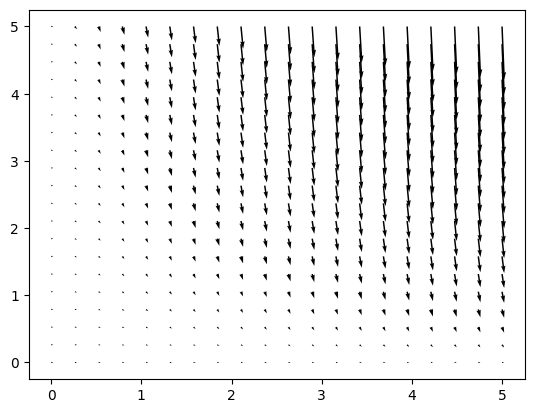

In [4]:
## Define the function F
def F(t,y):
    return -y*t

## Plot the direction field
v = F(t,y) # Rise
u = np.ones_like(v) # Run
plt.quiver(t,y,u,v) # Plot direction field

Unfortunately, the default method for quiver is to use the $u,v$ arguments to determine the magnitude of the vectors, which is used to scale the vectors. This leads to the plots being a little bit ugly and difficult to read at spots when the magnitude is either too small, or too large. We can "normalize" the vectors by dividing by the magnitude of the vector. I.e. we define

\begin{equation}
\tilde{u} = \frac{u}{\sqrt{u^2+v^2}}, \qquad \tilde{v} = \frac{v}{\sqrt{u^2+v^2}}
\end{equation}

This effectively removes the size information from the vectors, and leaves us with just the direction information. The result is a much better picture.

Text(0.5, 0, 't')

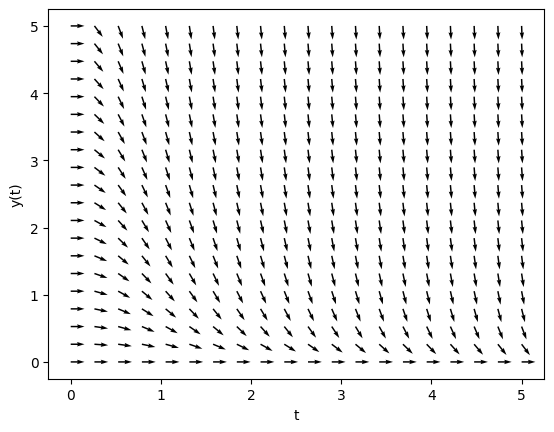

In [5]:
u_t = u / np.sqrt(u**2+v**2) # Normalized vectors
v_t = v / np.sqrt(u**2+v**2) # Normalized vectors
plt.quiver(t,y,u_t,v_t) # Quiver plots the arrows
plt.ylabel("y(t)")
plt.xlabel("t")

The arrows in a slope field can be used to help determine where a solution will \"go\" if it starts at a certain point. For example, if we consider the solution that starts at $(t_0,y_0) = (0,2)$, we see that it initially starts out by going to the right, then decreases in the y-direction while increasing in the t-direction. In fact, we can solve this equation for y and plot the solution over the direction field to see that that is exactly what happens. The solution to this differential equation with the initial condition $(t_0,y_0) = (0,2)$ is $$ y(t) = 2e^{-\frac{t^2}{2}}$$

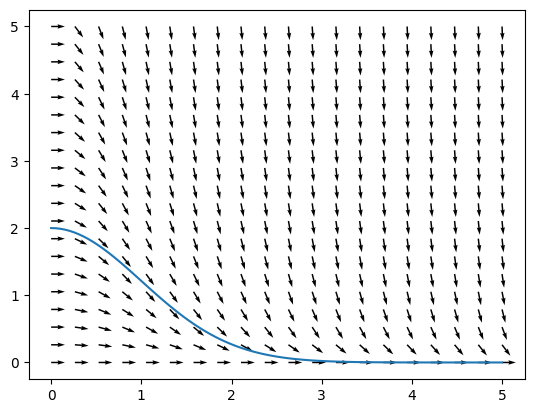

In [6]:
plt.quiver(t,y,u_t,v_t) # Plot the direction field again
t2 = np.linspace(0,5,100) #create t values for solution
def sol(t): # Define a function y(t) for the given initial condition
    return 2*np.exp(-(t**2)/2)
y2 = [sol(j) for j in t2] # For each t-value compute the corresponding y-value.
plt.plot(t2,y2) #Plot

## Tasks

<b> Task 1 </b><br>
Create a direction field for the differential equation $$\frac{dy}{dt} = y\left(1-\frac{y}{2}\right)$$ for $t\in(0,10)$ and $y \in (0,4)$

<b> Task 2 </b> <br>
A one parameter family of solutions to the equation from task 1 is 
$$ y(t) = \frac{2Ce^{t}}{1+Ce^{t}}.$$
On the same plot as the direction field from task 1, plot the solutions corresponding to the initial conditions $y(0) = 1$ and $y(0) = 3$. In a markdown box, explain how you found $C$, and what happens to each solution.

<b> Task 3 </b><br>
A canoer is trying to get to their campsite located at (0,0). They always keep the nose of their boat pointed towards their camp site and paddle at a steady 4km/h, but are dealing with a constant 2km/h current pulling them due north. The position of the canoe in $\mathbb{R}^2$ is given by $(x,y)$ where 
$$ \frac{dx}{dt} = -\frac{4x}{\sqrt{x^2+y^2}}$$
$$ \frac{dy}{dt} = -\frac{4y}{\sqrt{x^2+y^2}}+2$$
describe the direction the canoe is pointing. Plot a direction field with $(x,y) \in [0,5]\times[-2,2]$.

<i>Hint:</i> Use $dy/dt$ as the $v$-component of the quiver function, and $dx/dt$ as the $u$-component of the quiver function

<b> Task 4 </b><br>
Suppose that the canoe starts at a point $4$ km due east of the campsite.

The previous equation can be written in parametric form by dividing the $\frac{dy}{dt}$ equation by the $\frac{dx}{dt}$ equation, giving 
$$ \frac{dy}{dx} = \frac{y - \frac{1}{2} \sqrt{x^2+y^2}}{x}$$
This is a 1st order differential equation for $y$. A solution to this equation is given by 
$$ y(x) = 2\left[\left(\frac{x}{4}\right)^{1/2}-\left(\frac{x}{4}\right)^{3/2}\right]$$
In a markdown box, verify that this is a solution for $x \in (0,\infty)$ with $(y_0,x_0) = (0,4)$

<b>Task 5</b><br>
Plot the solution from task 4 on the same plot as the direction field from task 3. Indicate on the plot where the starting and ending points are.